In [1]:
from skimage.io import imread
import RedLionfishDeconv as rl
from tnia.plotting.projections import show_xyz_max, show_xy_zy_max
from sdeconv.deconv import PSFGibsonLanni

C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
dir_name='D:\\images\\'
#dir_name='/home/bnorthan/Images/'

im_name = dir_name+'tnia-python-images/notebooks/deconvolution/cyto/blurred/blurred_.tif'
phantom_name = dir_name+'tnia-python-images/notebooks/deconvolution/cyto/phantom/phantom_.tif'

im=imread(im_name)
phantom=imread(phantom_name)

In [3]:
im=im.astype('float32')

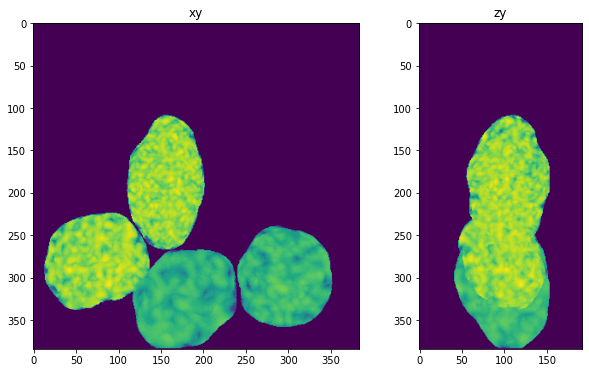

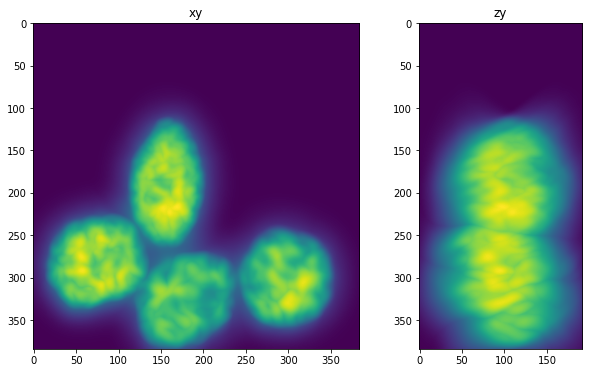

In [4]:
fig=show_xy_zy_max(phantom, figsize=(10,6))
fig=show_xy_zy_max(im, figsize=(10,6))

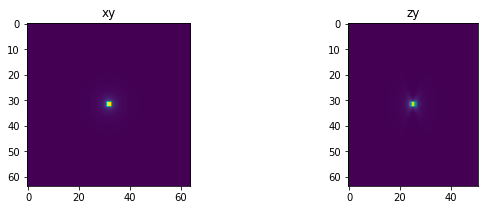

In [5]:
gl = PSFGibsonLanni((51,64,64),83,200,1.4,365,150,1.5,1.5)
psf = gl.run()
psf=psf/psf.sum()
fig=show_xy_zy_max(psf)

In [6]:
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc
decon = richardson_lucy_nc(im, psf, 200)

get lib


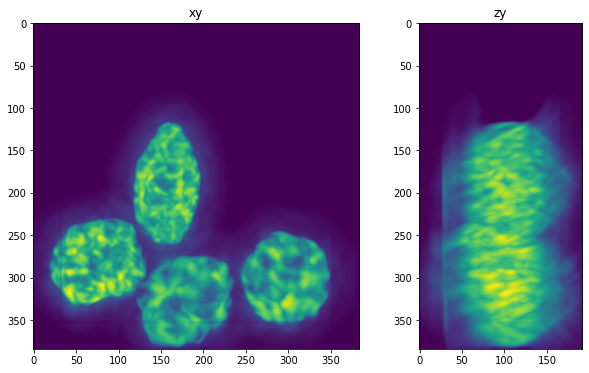

In [7]:
fig=show_xy_zy_max(decon, figsize=(10,6))

In [161]:
im.dtype

dtype('float32')

In [163]:
psf.sum()

0.9999999